<a href="https://colab.research.google.com/github/ayushgupta1212/DA-Projects/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

##Reading Dataset

In [2]:
df=pd.read_csv('https://github.com/ayushgupta1212/Data-Sets/raw/main/BitcoinDataset3.csv')


In [3]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020","11,105.80","11,802.60","12,061.10","10,730.70",698.62K,-5.91%
1,"Aug 01, 2020","11,803.10","11,333.20","11,847.70","11,226.10",611.47K,4.14%
2,"Jul 31, 2020","11,333.40","11,096.50","11,434.80","10,964.60",530.95K,2.14%
3,"Jul 30, 2020","11,096.20","11,105.80","11,164.40","10,861.60",501.14K,-0.09%
4,"Jul 29, 2020","11,105.90","10,908.40","11,336.50","10,771.80",576.83K,1.81%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1190 non-null   object
 1   Price     1190 non-null   object
 2   Open      1190 non-null   object
 3   High      1190 non-null   object
 4   Low       1190 non-null   object
 5   Vol.      1187 non-null   object
 6   Change %  1190 non-null   object
dtypes: object(7)
memory usage: 65.2+ KB


##DATA PREPROCESSING
remove "," , "%" , "K" , "M" etc from numeric data

In [5]:
df["Price"]=df["Price"].replace(",","",regex=True)
df["Open"]=df["Open"].replace(",","",regex=True)
df["High"]=df["High"].replace(",","",regex=True)
df["Low"]=df["Low"].replace(",","",regex=True)
df["Change %"]=df["Change %"].replace("%","",regex=True)
df["Vol."]=df["Vol."].replace("K","",regex=True)
df["Vol."]=df["Vol."].replace("M","",regex=True)

In [6]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2020",11105.80,11802.60,12061.10,10730.70,698.62,-5.91
1,"Aug 01, 2020",11803.10,11333.20,11847.70,11226.10,611.47,4.14
2,"Jul 31, 2020",11333.40,11096.50,11434.80,10964.60,530.95,2.14
3,"Jul 30, 2020",11096.20,11105.80,11164.40,10861.60,501.14,-0.09
4,"Jul 29, 2020",11105.90,10908.40,11336.50,10771.80,576.83,1.81
...,...,...,...,...,...,...,...
1185,"May 05, 2017",1507.80,1516.80,1588.10,1485.00,120.38,-0.59
1186,"May 04, 2017",1516.80,1485.60,1609.80,1437.10,136.71,2.10
1187,"May 03, 2017",1485.60,1445.90,1496.40,1424.10,81.72,2.74
1188,"May 02, 2017",1445.90,1415.80,1471.10,1394.80,70.01,2.13


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1190 non-null   object
 1   Price     1190 non-null   object
 2   Open      1190 non-null   object
 3   High      1190 non-null   object
 4   Low       1190 non-null   object
 5   Vol.      1187 non-null   object
 6   Change %  1190 non-null   object
dtypes: object(7)
memory usage: 65.2+ KB


##Check for any missing values or null values

In [8]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        3
Change %    0
dtype: int64

##Changing Object datatype into float64 and int datatype

In [9]:
df["Price"]=df["Price"].astype('float64')
df["Open"]=df["Open"].astype('float64')
df["High"]=df["High"].astype('float64')
df["Low"]=df["Low"].astype('float64')
df["Change %"]=df["Change %"].astype('float64')
#df["Vol."] = pd.to_numeric(df["Vol."], downcast="Float", errors="coerce")
df["Vol."] = pd.to_numeric(df["Vol."] , errors="coerce")

In [10]:
# prompt: convert 'Date' attribute from object to float64

#df["Date"] = pd.to_numeric(df["Date"], downcast="float", errors="coerce")


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1190 non-null   object 
 1   Price     1190 non-null   float64
 2   Open      1190 non-null   float64
 3   High      1190 non-null   float64
 4   Low       1190 non-null   float64
 5   Vol.      1187 non-null   float64
 6   Change %  1190 non-null   float64
dtypes: float64(6), object(1)
memory usage: 65.2+ KB


##change date time format into yyyy-mm-dd

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y').dt.strftime('%Y-%m-%d')

In [13]:
df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-02,11105.8,11802.6,12061.1,10730.7,698.62,-5.91
1,2020-08-01,11803.1,11333.2,11847.7,11226.1,611.47,4.14
2,2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95,2.14
3,2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14,-0.09
4,2020-07-29,11105.9,10908.4,11336.5,10771.8,576.83,1.81


##Remove default indexing and make Date as default index

In [14]:
#df=df.set_index('Date') permamently saves changes to df
df=df.set_index('Date')

#or
#df.set_index('Date',inplace=True)  also saves changes permanently


In [15]:
df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-08-02,11105.8,11802.6,12061.1,10730.7,698.62,-5.91
2020-08-01,11803.1,11333.2,11847.7,11226.1,611.47,4.14
2020-07-31,11333.4,11096.5,11434.8,10964.6,530.95,2.14
2020-07-30,11096.2,11105.8,11164.4,10861.6,501.14,-0.09
2020-07-29,11105.9,10908.4,11336.5,10771.8,576.83,1.81


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1190 entries, 2020-08-02 to 2017-05-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     1190 non-null   float64
 1   Open      1190 non-null   float64
 2   High      1190 non-null   float64
 3   Low       1190 non-null   float64
 4   Vol.      1187 non-null   float64
 5   Change %  1190 non-null   float64
dtypes: float64(6)
memory usage: 65.1+ KB


##Importing seaborn

In [17]:
import seaborn as sns

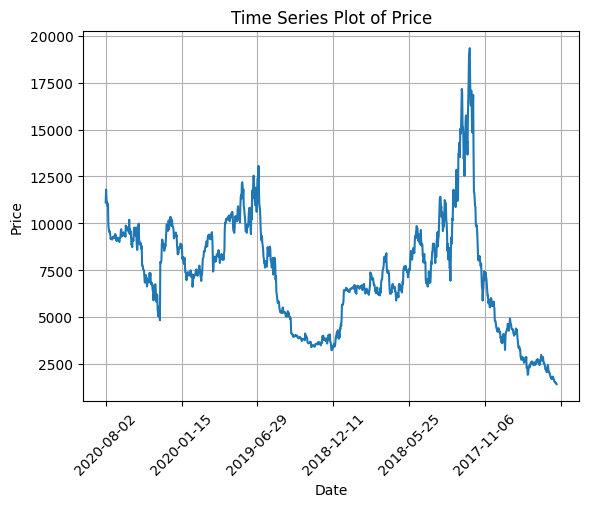

In [18]:
#sns.lineplot(x='Date', y='Price', data=df)
#plt.xlabel('Date')
#plt.ylabel('Price')
#plt.title('Time Series Plot of Price')
#plt.grid(True)
#plt.xticks(rotation=45)
#plt.show()
target=df['Price']
target.plot(grid=True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot of Price')
plt.xticks(rotation=45)
plt.show()

In [19]:
df.index.dtype

dtype('O')

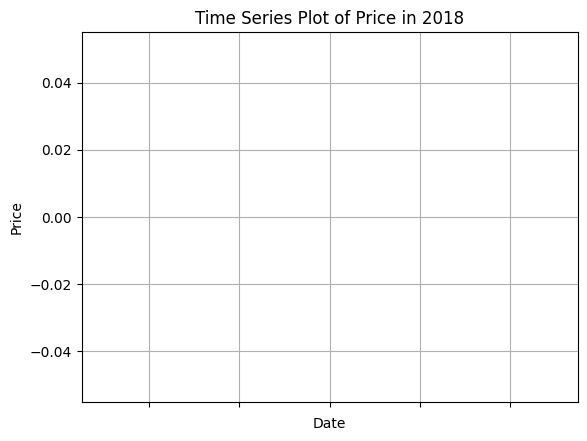

In [20]:

df_2018 = df['2018-01-01':'2018-12-31']
target = df_2018['Price']
target.plot(grid=True)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Time Series Plot of Price in 2018')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='Date'>

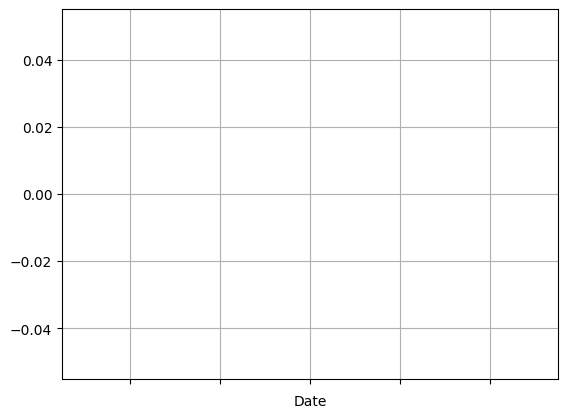

In [21]:
df_2018 = df.loc['2018-01-01':'2018-12-31']

target_2018=df_2018['Price']

target_2018.plot(grid=True)

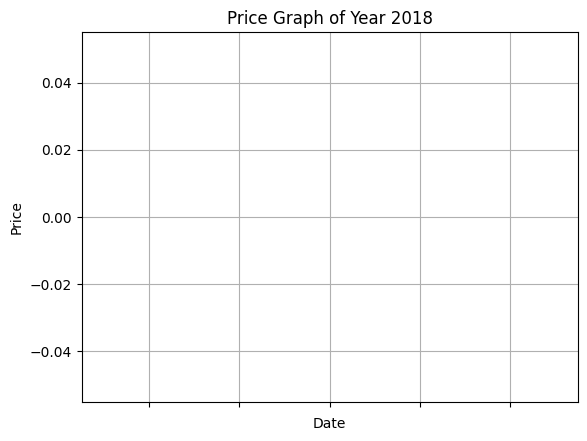

In [22]:
# prompt: display price graph of year 2018 only starting from 2018-01-01 till 2018-12-31

# Access the rows for the year 2018
df_2018 = df.loc['2018-01-01':'2018-12-31']

# Extract the 'Price' column from the filtered DataFrame
target_2018 = df_2018['Price']

# Plot the 'Price' column
target_2018.plot(grid=True)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Graph of Year 2018')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: xlabel='Date'>

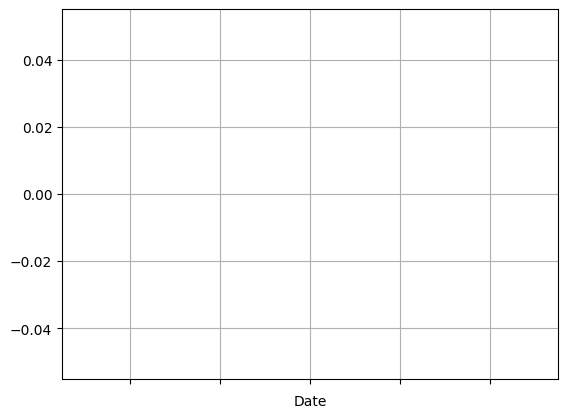

In [26]:
df_2019 = df.loc['2019-01-01':'2019-12-31']

target_2019=df_2019['Price']

target_2019.plot (grid=True)

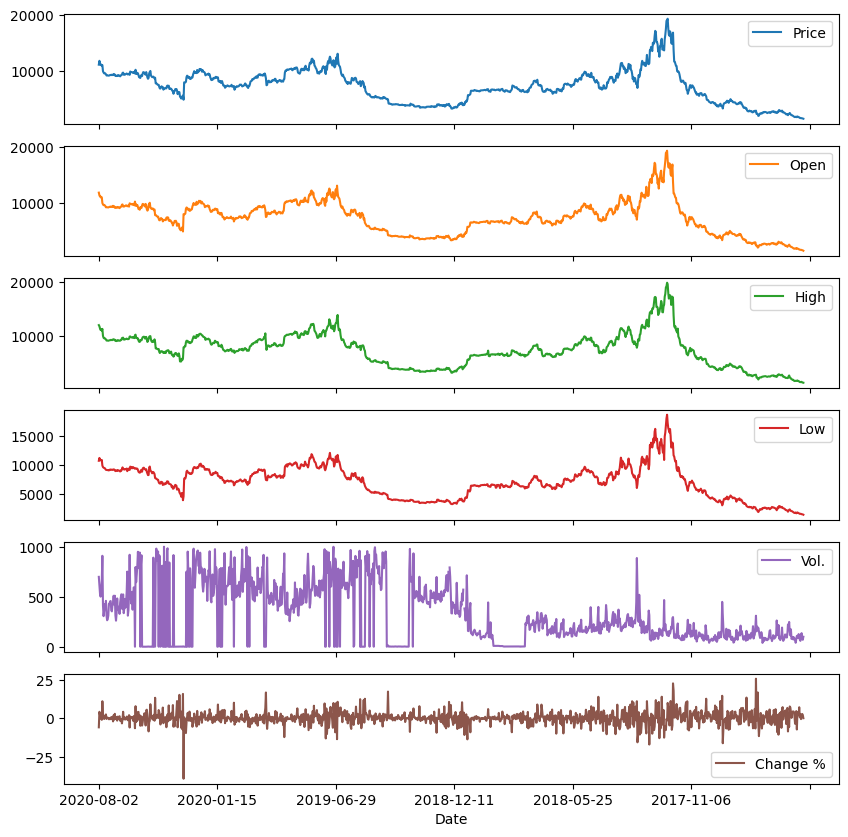

In [27]:
df.plot(subplots=True, figsize=(10,10))
plt.show()

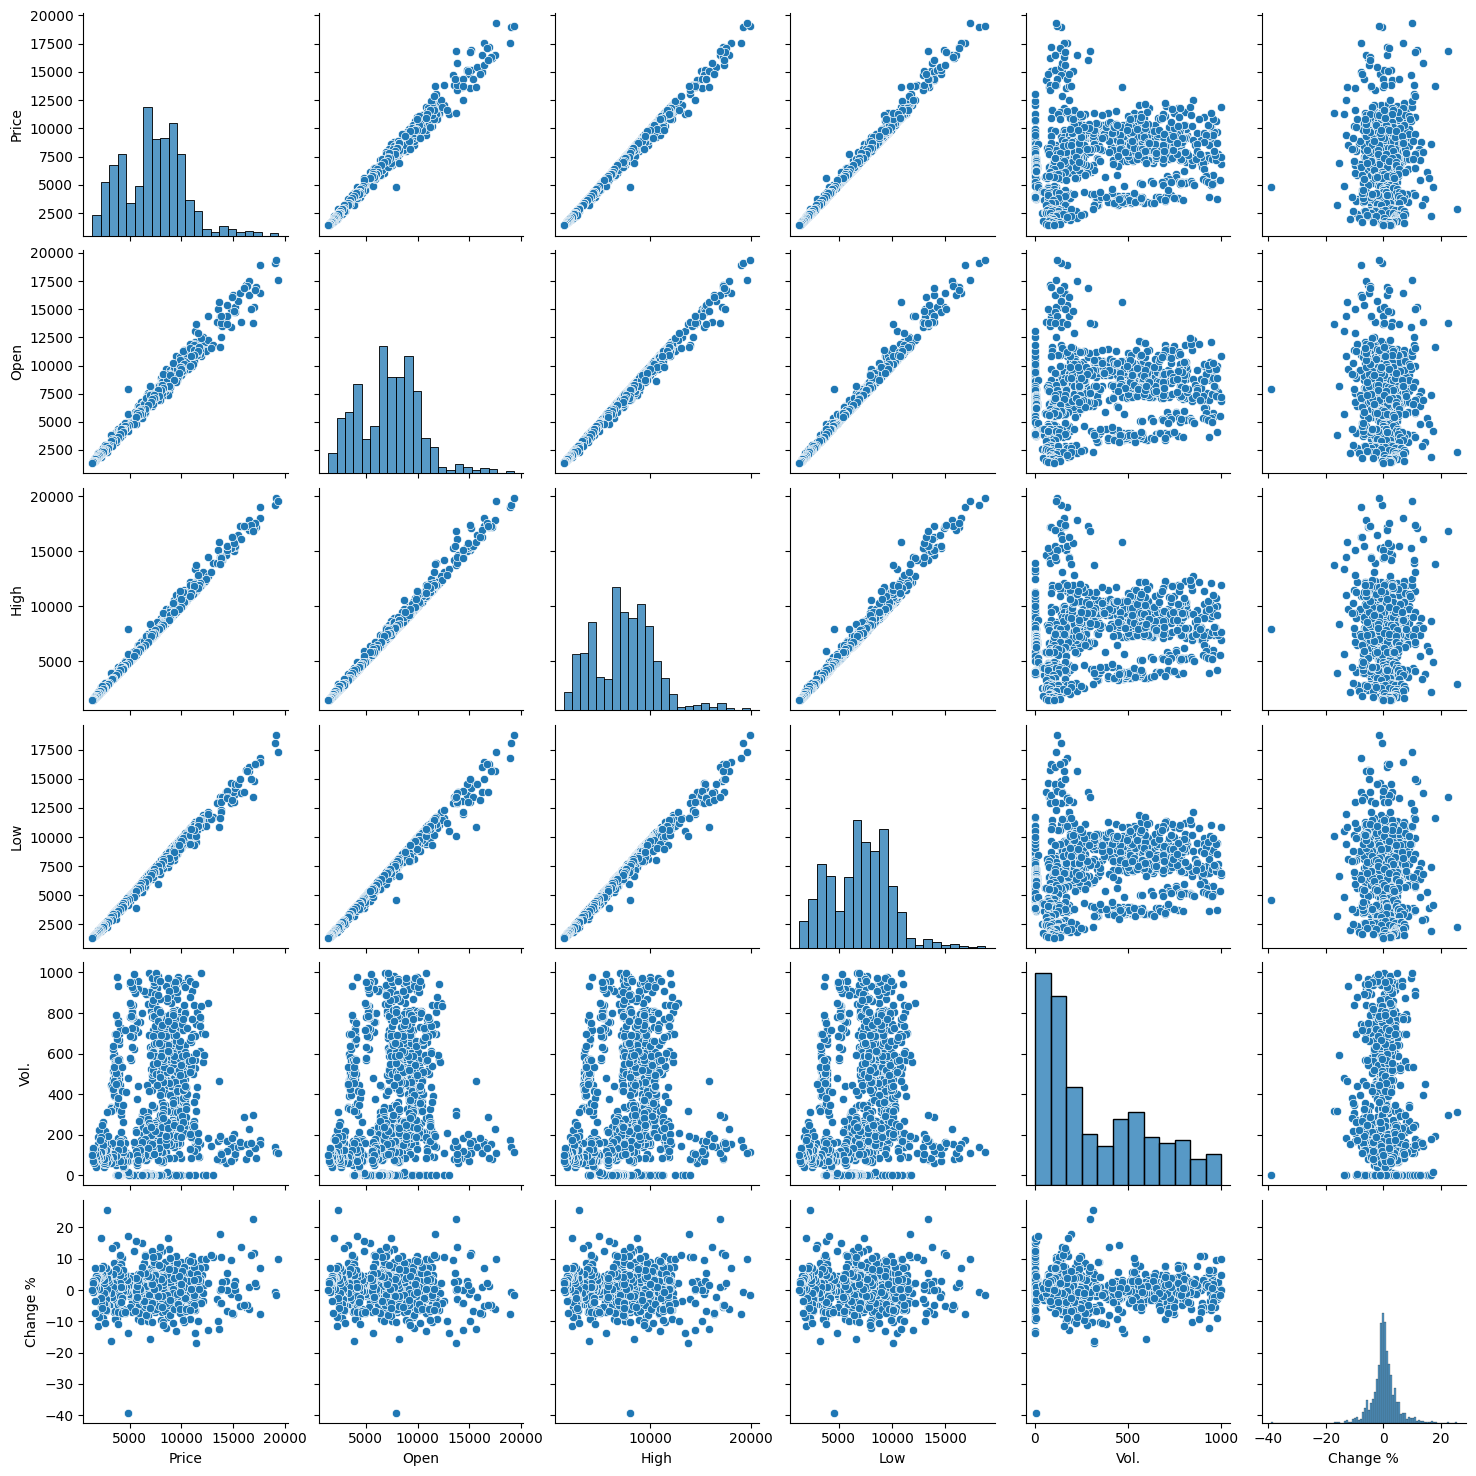

In [28]:
sns.pairplot(df)

plt.show()

In [29]:
# Print the column names of the DataFrame
print(df.columns)

# Use the correct column names to calculate the correlation matrix
corr = df[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr()

# Print the correlation matrix
print(corr)

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
             Price      Open      High       Low      Vol.  Change %
Price     1.000000  0.992000  0.996439  0.995404  0.182075  0.026430
Open      0.992000  1.000000  0.996026  0.992945  0.185995 -0.087664
High      0.996439  0.996026  1.000000  0.991235  0.173983 -0.026556
Low       0.995404  0.992945  0.991235  1.000000  0.197464 -0.018682
Vol.      0.182075  0.185995  0.173983  0.197464  1.000000 -0.054359
Change %  0.026430 -0.087664 -0.026556 -0.018682 -0.054359  1.000000


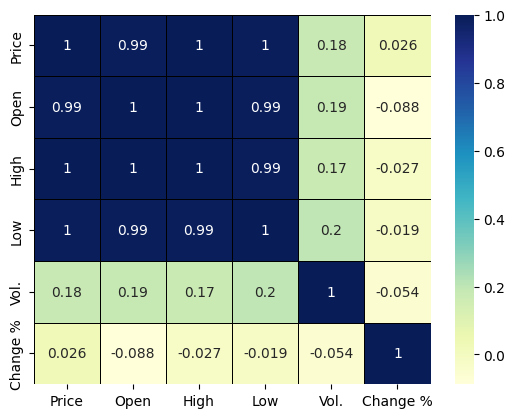

In [30]:
sns.heatmap(corr, annot=True, cmap="YlGnBu", linewidths=0.5, linecolor='black')
plt.show()

In [31]:
df.fillna(method='ffill', inplace=True)

In [32]:
df.isna().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [33]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df ['Price'], regression='c' , nlags='auto')

print('KPSS Test Statistic: ',kpss_test[0])

print('KPSS p-value: ',kpss_test[1])

print('KPSS Critical Values: ')

for key,value in kpss_test[3].items():
  print ( f'{key} : {value}')

KPSS Test Statistic:  0.7718239563002028
KPSS p-value:  0.01
KPSS Critical Values: 
10% : 0.347
5% : 0.463
2.5% : 0.574
1% : 0.739


<ipython-input-33-c6cfe317d69f>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df ['Price'], regression='c' , nlags='auto')


In [34]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df['Price'], autolag='AIC')

print('ADF Statistic: ', adf_test[0])

print('ADF p-value: ', adf_test[1])

print('ADF Critical Values: ')

for key, value in adf_test[4].items():
  print (f'{key}: {value}')

ADF Statistic:  -2.2166514685468264
ADF p-value:  0.2002575364116962
ADF Critical Values: 
1%: -3.435956259544601
5%: -2.8640155784421606
10%: -2.568088052103053


In [35]:
# Based on the KPSS test results:

kpss_p_value = kpss_test[1]

if kpss_p_value > 0.05:
  print("The time series is non-stationary.")

else:
  print("The time series is stationary.")

The time series is stationary.


In [36]:
# Based on the ADF test results:

adf_p_value = adf_test[1]

if adf_p_value > 0.05:
  print("The time series is non-stationary.")

else:
  print("The time series is stationary.")

The time series is non-stationary.
